Лабораторна робота №3
Студента групи МІТ-31 (Друга підгрупа)
Шило Івана Костянтиновича

Завдання

1. Створити набір даних за допомогою DatasetGenerator 

2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python.

4. Для отриманих наборів даних провести встановленні кроки моделювання (класифікації).

5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.

Моделювання для набору даних з сайту - https://www.kaggle.com/christianlillelund/passenger-list-for-the-estonia-ferry-disaster

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [372]:
#!pip install -U scikit-learn

Оцінка та аналіз даних для побудови моделі

In [373]:
df = pd.read_csv('estonia-passenger-list.csv')
df.head(10)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,F,71,P,0
6,7,Sweden,HJALMAR,AHLSTROM,M,60,P,0
7,8,Estonia,PILLE,AHMAN,F,18,P,0
8,9,Estonia,TORMI,AINSALU,M,30,C,0
9,10,Sweden,ANNA MARIA,ALDRIN,F,63,P,0


In [374]:
df.tail()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


In [375]:
#this values does not matter as much - drop
df = df.drop("PassengerId", axis= 1)
df = df.drop("Firstname", axis= 1)
df = df.drop("Lastname", axis= 1)
#df = df.drop("Country", axis= 1)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   989 non-null    object
 1   Sex       989 non-null    object
 2   Age       989 non-null    int64 
 3   Category  989 non-null    object
 4   Survived  989 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.8+ KB


In [377]:
df.describe()

,Age,Survived
count,989.000000,989.000000
mean,44.575329,0.138524
std,17.235146,0.345624
min,0.000000,0.000000
25%,30.000000,0.000000
50%,44.000000,0.000000
75%,59.000000,0.000000
max,87.000000,1.000000


In [378]:
print('distribution of Sex :\n', df['Sex'].value_counts())
print('\n distribution of Age :\n', df['Age'].value_counts())
print('\n distribution of Category:\n', df['Category'].value_counts())

distribution of Sex :
 M    503
F    486
Name: Sex, dtype: int64

 distribution of Age :
 21    27
45    27
67    25
30    25
50    24
      ..
12     1
9      1
6      1
4      1
87     1
Name: Age, Length: 78, dtype: int64

 distribution of Category:
 P    796
C    193
Name: Category, dtype: int64


In [379]:
#to see Number of Survivors by sex
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
F    0           459
     1            27
M    0           393
     1           110
Name: Survived, dtype: int64

Візуалізація даних

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

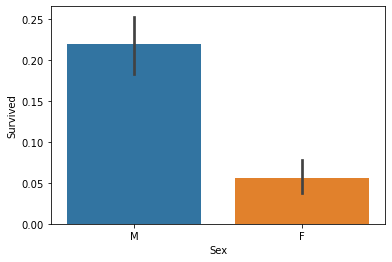

In [380]:
sns.barplot(x = 'Sex', y='Survived', data =  df)

<AxesSubplot:xlabel='Category', ylabel='Survived'>

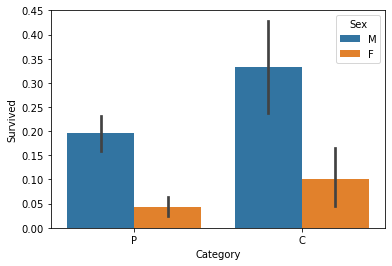

In [381]:
sns.barplot(x='Category', y='Survived', hue='Sex', data = df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

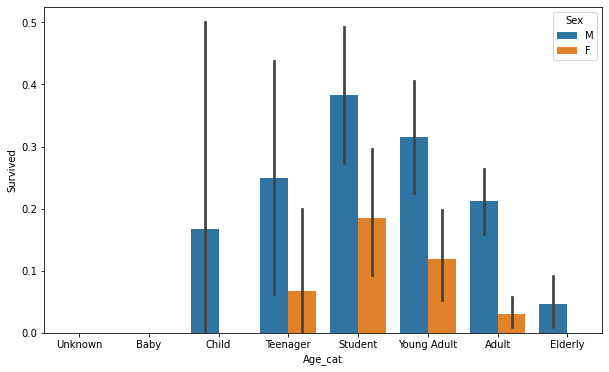

In [382]:
# Declares a function that returns a delimiter according to the input age. Used in DataFrame application labda.

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat


plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue='Sex', data = df, order = group_names)

In [383]:
df.head()

,Country,Sex,Age,Category,Survived,Age_cat
0,Sweden,M,62,P,0,Elderly
1,Estonia,F,22,C,0,Student
2,Estonia,F,21,C,0,Student
3,Sweden,M,53,C,0,Adult
4,Sweden,F,55,P,0,Adult


Підготовка даних для моделі

In [384]:
df.drop(['Country', 'Sex', 'Category', 'Age_cat'],axis=1,inplace=True)

In [385]:
from sklearn.model_selection  import train_test_split
X_train_data = df.drop('Survived', axis=1)
y_train_data = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=11\
                                                   ,stratify=y_train_data)

In [386]:
from sklearn.preprocessing import StandardScaler # import the scaler
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data

Побудова моделі

In [387]:
# Logestic Regression 
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

Оцінка моделі

In [388]:
# creating predictions 
y_pred = log_model.predict(Scaled_X_test)

In [389]:
# import evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [390]:
# create the confusion matrix
confusion_matrix(y_test, y_pred)

array([[170,   1],
       [ 27,   0]], dtype=int64)

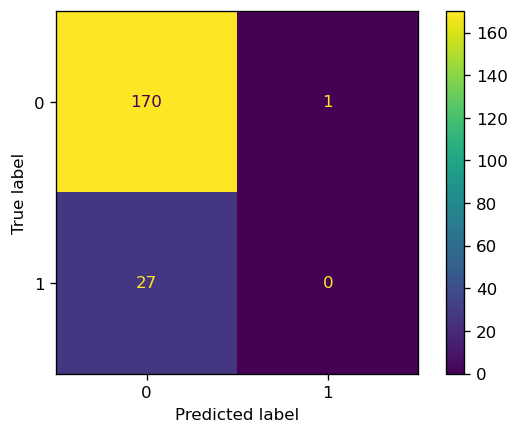

In [391]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [392]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.86

In [393]:
# generate the classification report 
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       171
           1       0.00      0.00      0.00        27

    accuracy                           0.86       198
   macro avg       0.43      0.50      0.46       198
weighted avg       0.75      0.86      0.80       198



Оптимізація моделі та переоцінка 

(Я так й не дочекався результату, чекав 10 хвилин)

In [394]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV 

# set the range of paprameters
penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0,20,50)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['ovr', 'multinomial']
l1_ratio = np.linspace(0, 1, 20)

# build the parameter grid
param_grid = {
   'penalty': penalty,
    'C': C,
    'solver': solver,
    'multi_class': multi_class, 
    'l1_ratio': l1_ratio
}

# initiate and fit the Grid Search Model
grid_model = GridSearchCV(log_model, param_grid = param_grid)
grid_model.fit(Scaled_X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_model.best_params_

In [ ]:
# creating predictions 
y_pred = grid_model.predict(Scaled_X_test)

# plot the confusion matrix
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(grid_model, Scaled_X_test, y_test, ax = ax);

In [ ]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

In [ ]:
# generate the classification report 
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method